In [1]:
# import thr library
import numpy as np
from sklearn.datasets import make_regression
%matplotlib inline
import matplotlib.pyplot as plt
import time
from matplotlib import animation
import pandas as pd
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Set up the Data 
X, y = make_regression(n_samples=100, n_features=1,
                                      n_informative=1, noise=25, random_state=2021)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y_scaled = scaler.fit_transform(y)

In [3]:
# x = X.reshape(100,).copy()

In [4]:
y.shape , X.shape

((100,), (100, 1))

In [5]:
# data = pd.DataFrame({"X" : x, "Y" : y})

In [6]:
# data.to_csv("./theData.csv" , index=False)

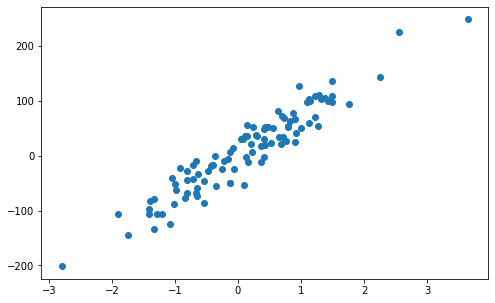

In [7]:
# let's plot the data
fig , ax = plt.subplots(figsize=(8,5))
ax.scatter(X, y);

In [8]:
alpha = 0.005 # learning rate
iter_num = 450  # number of iterations

## Batch Gradient Descent

In [9]:
# Batch Gradient descent
def gradient_descent1(X,y,iter_num=iter_num,alpha=alpha,m=0,b=0):
    error = []
    upload = 0
    for i in np.arange(0,iter_num):
        y_pred = X*m + b
        error.append(mse(y.reshape(-1,1), y_pred))
        y_diff = (y.reshape(-1,1) - y_pred)
        dm = -2*(np.sum(y_diff*X)/X.shape[0])
        db = -2*(np.sum(y_diff)/X.shape[0])
        m = m - alpha*dm
        b = b - alpha*db
        # "upload" Pour avoir les informations sur le nombres de mises à jour
        upload = upload + 1
    return (m,b,error,upload)

In [10]:
m1,b1,e1,u1 = gradient_descent1(X,y)

In [34]:
print("m : ", m1, "| b : ",b1, "| erreur final : ",e1[449], "| mise à jour : ",u1)

m :  71.07455025668824 | b :  1.5600615598276455 | erreur final :  583.924012119296 | mise à jour :  450


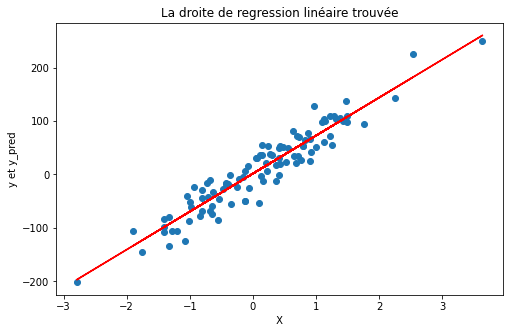

In [12]:
# La droite de regression linéaire trouvée (en rouge)
fig , ax = plt.subplots(figsize=(8,5))
y_pred = X*m1 + b1
ax.scatter(X, y)
ax.plot(X, y_pred, color = "red");
ax.set(title = "La droite de regression linéaire trouvée",
      xlabel = " X ",
      ylabel = "y et y_pred");

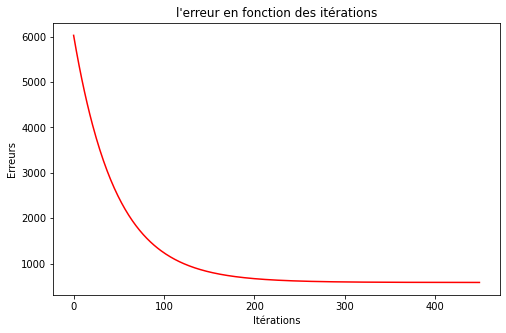

In [13]:
# Evolution de l'error en fonction des itérations (Batch Version)
iterations = [i for i in np.arange(0,iter_num)]
fig , ax = plt.subplots(figsize=(8,5))
ax.plot( iterations, e1, color = "red");
ax.set(title="l'erreur en fonction des itérations", xlabel="Itérations", ylabel="Erreurs");

In [14]:
global index
index = [i for i in range(100)]

In [15]:
X[0:1]

array([[0.10275122]])

## Stochastic Gradient Descent

In [35]:
# Stochastic gradient descent 
def stochastic_gradient_descent(X,y,iter_num=iter_num,alpha=alpha,m=0,b=0):
    upload2 = 0
    error2 = []
    
    for i in np.arange(0,iter_num):
        np.random.shuffle(index)
        for rand_index in index:
            ind_x = X[rand_index:rand_index+1]
            ind_y = y[rand_index:rand_index+1]
            y_pred = ind_x*m + b
            y_diff = (y[rand_index] - y_pred)
            dm = -2*((y_diff*ind_x))
            db = -2*((y_diff))
            m = m - alpha*dm
            b = b - alpha*db 
            upload2 = upload2 + 1
#             break
        error2.append( mse(ind_y, ind_x*m + b) )
    return (m,b,error2,upload2)
        
    

In [65]:
m2,b2,e2,u2 = stochastic_gradient_descent(X.reshape(100,), y)

In [66]:
print("m : ", m2, "| b : ",b2, "| erreur final : ",e2[449], "| mise à jour : ",u2)

m :  [71.4144671] | b :  [0.98741126] | erreur final :  202.7247181651107 | mise à jour :  45000


In [67]:
e2[0]

99.4363454354019

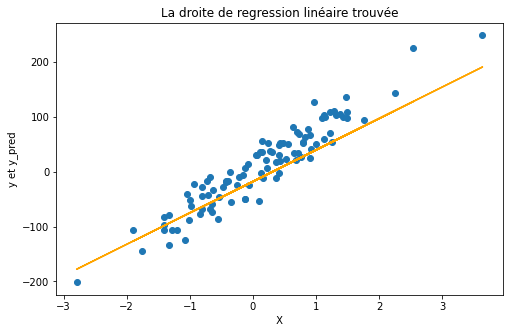

In [68]:
fig , ax = plt.subplots(figsize=(8,5))
y_pred = X*57.414 + (-17.537)
ax.scatter(X, y)
ax.plot(X, y_pred, color = "orange");
ax.set(title = "La droite de regression linéaire trouvée",
      xlabel = " X ",
      ylabel = "y et y_pred");

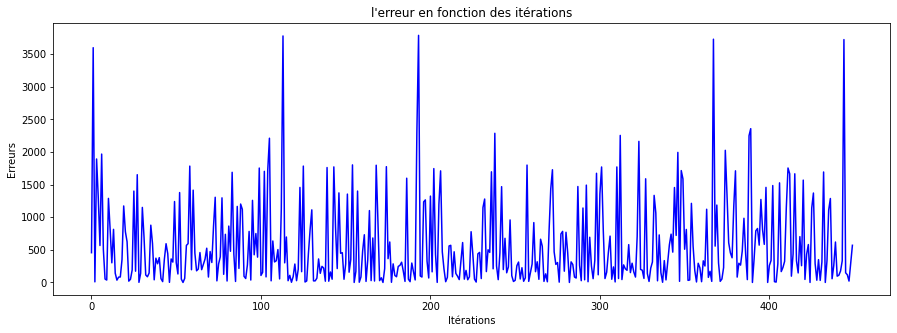

In [39]:
# Evolution de l'error en fonction des itérations (Stochastic Version)
iterations = [i for i in np.arange(0,iter_num)]
fig , ax = plt.subplots(figsize=(15,5))
ax.plot( iterations, e2, color = "blue");
# ax.plot( iterations, error, color = "red");
ax.set(title="l'erreur en fonction des itérations", xlabel="Itérations", ylabel="Erreurs");

## Mini Bacht gradient descent

In [21]:
def get_bacht(bacht_size, index, X, Y):
    ln = len(index)
    x = []
    y= []
    bacht_list = []
    nbr_bacht = ln // bacht_size
    rst_bacht = ln % bacht_size
    j = 0
    k = bacht_size
    for i in range(nbr_bacht): 
        ind = index[j:k]
#         print(ind)
        for el in ind:
            x.append(X[el])
            y.append(Y[el])            
        bacht_list.append((x,y))
        x = []
        y= []
        j = j + bacht_size
        k = k + bacht_size
        
    return bacht_list
           

In [72]:
def mini_bacht_gd(X,y,iter_num=iter_num,alpha=alpha,m=0,b=0,bacht_size=100):
    e3 = []
    upload3 = 0
    for i in np.arange(0,iter_num):
        np.random.shuffle(index)
        my_bacht = get_bacht(bacht_size, index, X, y)
#         print(len(my_bacht))
        for bacht in my_bacht:
            x_2 = np.array(bacht[0])
            y_2 = np.array(bacht[1])
            y_pred = x_2*m + b
            y_diff = (y_2.reshape(-1,1) - y_pred)
            dm = -2*(np.sum(y_diff*x_2)/x_2.shape[0])
            db = -2*(np.sum(y_diff)/x_2.shape[0])
            m = m - alpha*dm
            b = b - alpha*db
            upload3 = upload3 + 1
            #break
        e3.append(mse(y_pred.reshape(-1,1), y_2))
    return (m,b,upload3,e3) 

In [73]:
m3 , b3 , u3, e3 = mini_bacht_gd(X, y)

In [74]:
print("m : ", m3, "| b : ",b3, "| erreur final : ",e3[449], "| mise à jour : ",u3)

m :  71.07455025668824 | b :  1.560061559827645 | erreur final :  583.9240121192961 | mise à jour :  450


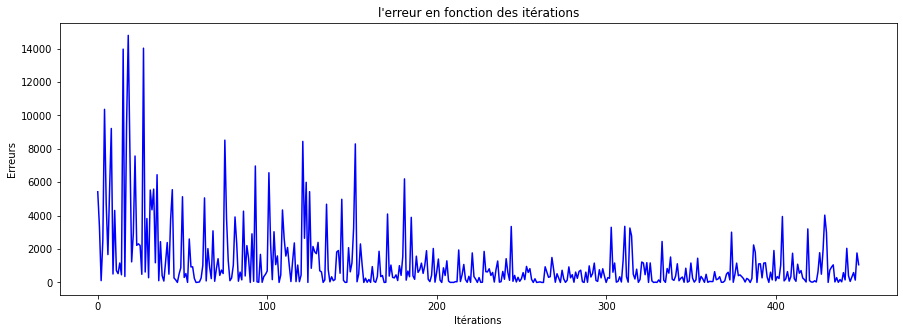

In [63]:
iterations = [i for i in np.arange(0,iter_num)]
fig , ax = plt.subplots(figsize=(15,5))
ax.plot( iterations, e3, color = "blue");
# ax.plot( iterations, error, color = "red");
ax.set(title="l'erreur en fonction des itérations", xlabel="Itérations", ylabel="Erreurs");

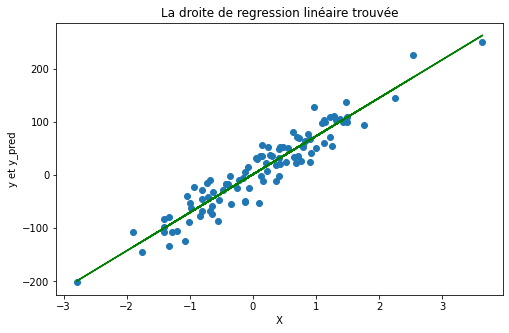

In [26]:
fig , ax = plt.subplots(figsize=(8,5))
y_pred = X*m3 + b3
ax.scatter(X, y)
ax.plot(X, y_pred, color = "green");
ax.set(title = "La droite de regression linéaire trouvée",
      xlabel = " X ",
      ylabel = "y et y_pred");

## Camparaison

In [27]:
e_25 = e3.copy()

In [28]:
e_1 = e3.copy()

In [29]:
e_50 = e3.copy()

In [30]:
e_100 = e3.copy()

In [31]:
e_5 = e3.copy()

In [32]:
e_75 = e3.copy()

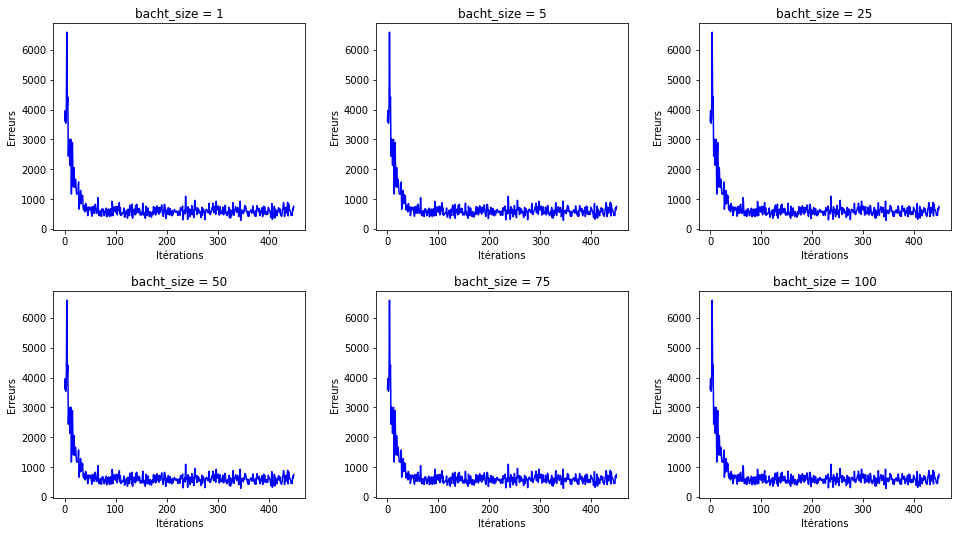

In [33]:
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3 , figsize = (14,8))
fig.tight_layout(pad=4.0)
ax1.plot( iterations, e_1, color = "blue");
# ax.plot( iterations, error, color = "red");
ax1.set(title="bacht_size = 1", xlabel="Itérations", ylabel="Erreurs");

ax2.plot( iterations, e_5, color = "blue");
# ax.plot( iterations, error, color = "red");
ax2.set(title="bacht_size = 5", xlabel="Itérations", ylabel="Erreurs");

ax3.plot( iterations, e_25, color = "blue");
# ax.plot( iterations, error, color = "red");
ax3.set(title="bacht_size = 25", xlabel="Itérations", ylabel="Erreurs");

ax4.plot( iterations, e_50, color = "blue");
# ax.plot( iterations, error, color = "red");
ax4.set(title="bacht_size = 50", xlabel="Itérations", ylabel="Erreurs");

ax5.plot( iterations, e_75, color = "blue");
# ax.plot( iterations, error, color = "red");
ax5.set(title="bacht_size = 75", xlabel="Itérations", ylabel="Erreurs");

ax6.plot( iterations, e_100, color = "blue");
# ax.plot( iterations, error, color = "red");
ax6.set(title="bacht_size = 100", xlabel="Itérations", ylabel="Erreurs");
